## Phase 1: Business Understanding

### 1.1 Project Objectives
The primary goal of this project is to build a classification model that predicts whether a customer will churn (i.e., stop using services) from SyriaTel, a telecommunications company. Identifying at-risk customers can help SyriaTel take proactive measures to retain them and reduce revenue loss.

### 1.2 Business Success Criteria
- Develop a predictive model with high accuracy and interpretability.
- Identify key factors contributing to customer churn.
- Provide actionable insights to help SyriaTel optimize retention strategies.

### 1.3 Data Mining Goals
- Perform exploratory data analysis (EDA) to uncover patterns and relationships.
- Preprocess and transform data to ensure high-quality input for modeling.
- Train and evaluate machine learning models to optimize churn prediction performance.

### 1.4 Project Constraints
- Data availability and quality: Potential missing or biased records.
- Business actionability: Insights must translate into retention strategies.
- Model interpretability: Ensuring telecom stakeholders can understand and act on results.

---



## Phase 2: Data Understanding

### 2.1 Data Collection
The dataset, sourced from Kaggle, contains customer records with various attributes that may influence churn behavior.

In [1]:
# Import relevant libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Data visualization
%matplotlib inline

# Modeling Libraries
import sklearn
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV
)

# Imbalanced Learning
from imblearn.over_sampling import SMOTE, SMOTENC

# Performance Metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    precision_recall_curve,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report
)

# Statistical Tools
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.inspection import permutation_importance


# Scaling & Preprocessing
from sklearn.preprocessing import StandardScaler

# ROC & Precision-Recall Metrics
from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)

# Model Interpretation
from sklearn.inspection import permutation_importance

# Supervised Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
file_path = "bigml.csv"

try:
    with open(file_path, 'r') as file:
        telecoms_df = pd.read_csv(file)
    # Print a message to confirm data loading
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



Data loaded successfully!


In [3]:
# Display basic info about the dataset
telecoms_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 2.2 Data Description
Key attributes in the dataset include:
- **Customer Account Information**: Customer ID, tenure, contract type.
- **Usage Patterns**: Monthly charges, total charges, number of calls, data usage.
- **Service Features**: Type of service plan, additional services subscribed.
- **Demographic Information**: Age, location, gender (if available).
- **Churn Indicator**: Binary target variable indicating whether a customer has churned.

In [4]:
# Summary of numerical features
telecoms_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Display a summary of the DataFrame including object columns
telecoms_df.describe(include='object')


,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


### 2.3 Data Quality Assessment
Initial checks include:
- Identifying missing values and potential imputation strategies.
- Checking for duplicate or inconsistent records.
- Assessing class imbalance in the target variable.
- Evaluating feature distributions for outliers and anomalies.

In [6]:
# Check for missing values
print("\nMissing Values:\n")
missing_values = telecoms_df.isnull().sum()
print(missing_values)



Missing Values:

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


### **2.4 Exploratory Data Analysis (EDA)**

### Customer Service Experience

### Does a higher number of customer service calls correlate with higher churn rates?

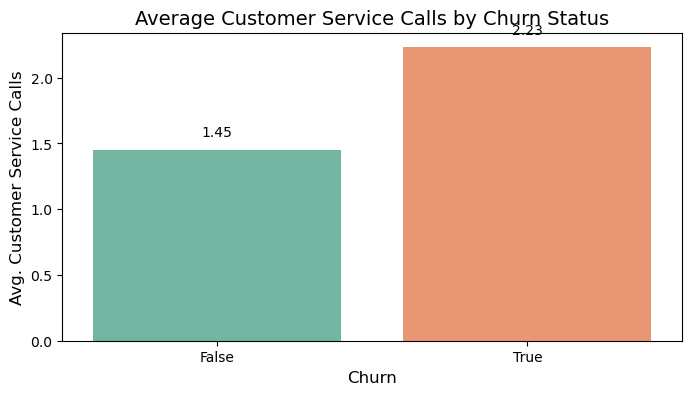

In [7]:
# Group by churn and calculate average customer service calls
service_calls_churn = telecoms_df.groupby("churn")["customer service calls"].mean()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=service_calls_churn.index, y=service_calls_churn.values, palette='Set2')

# Add labels
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Avg. Customer Service Calls", fontsize=12)
plt.title("Average Customer Service Calls by Churn Status", fontsize=14)

# Show values on bars
for i, value in enumerate(service_calls_churn.values):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", fontsize=10)

# Display the plot
plt.show()


   - Customers with **more service calls** are more likely to churn. 
   
   - High service calls indicate unresolved issues or dissatisfaction.

### Do customers with frequent customer service calls and high charges churn more?
>Exploring the Link Between Customer Complaints, Billing, and Churn

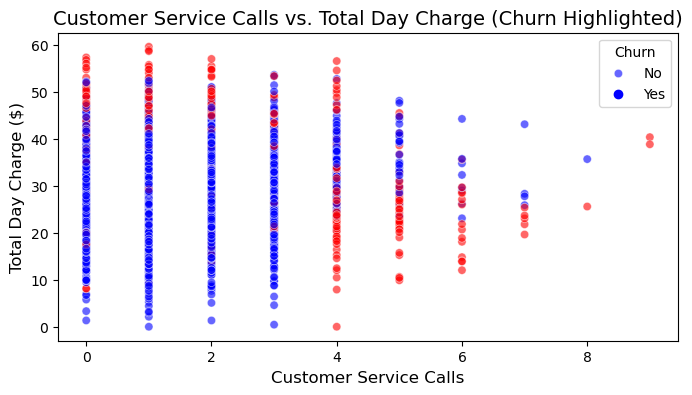

In [8]:
# Scatter plot: Customer Service Calls vs. Total Charges, colored by Churn
plt.figure(figsize=(8, 4))

sns.scatterplot(
    x=telecoms_df["customer service calls"], 
    y=telecoms_df["total day charge"], 
    hue=telecoms_df["churn"], 
    palette={0: "blue", 1: "red"},
    alpha=0.6
)

# Add labels
plt.xlabel("Customer Service Calls", fontsize=12)
plt.ylabel("Total Day Charge ($)", fontsize=12)
plt.title("Customer Service Calls vs. Total Day Charge (Churn Highlighted)", fontsize=14)

# Adjust legend
plt.legend(title="Churn", labels=["No", "Yes"])

# Display the plot
plt.show()


- The number of calls alone does not strongly impact churn.
- Total minutes and charges are stronger indicators.

### Usage & Billing

### Do customers with higher total charges (day/evening/night/international) churn more?
>Investigating the Relationship Between Total Charges and Churn

<Figure size 800x500 with 0 Axes>

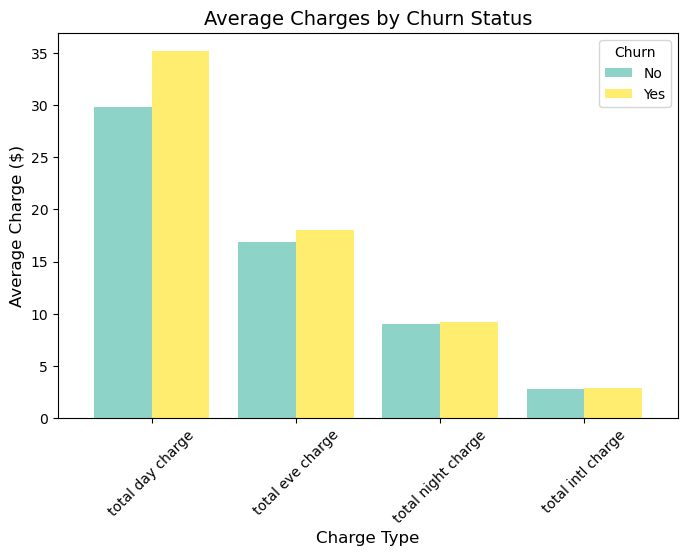

In [9]:
# Select charge-related columns
charge_columns = ["total day charge", "total eve charge", "total night charge", "total intl charge", "churn"]

# Calculate average charges for churned vs. non-churned customers
charges_churn = telecoms_df.groupby("churn")[charge_columns[:-1]].mean().T

# Plot with Set2 palette
plt.figure(figsize=(8, 5))
charges_churn.plot(kind="bar", figsize=(8, 5), colormap="Set3", width=0.8)

# Add labels
plt.xlabel("Charge Type", fontsize=12)
plt.ylabel("Average Charge ($)", fontsize=12)
plt.title("Average Charges by Churn Status", fontsize=14)
plt.xticks(rotation=45)

plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


   - Churned customers have **higher total charges** across all time periods.  
   - High costs could be a key reason for customer churn.

### Does total usage (minutes/calls) affect churn?

<Figure size 1000x500 with 0 Axes>

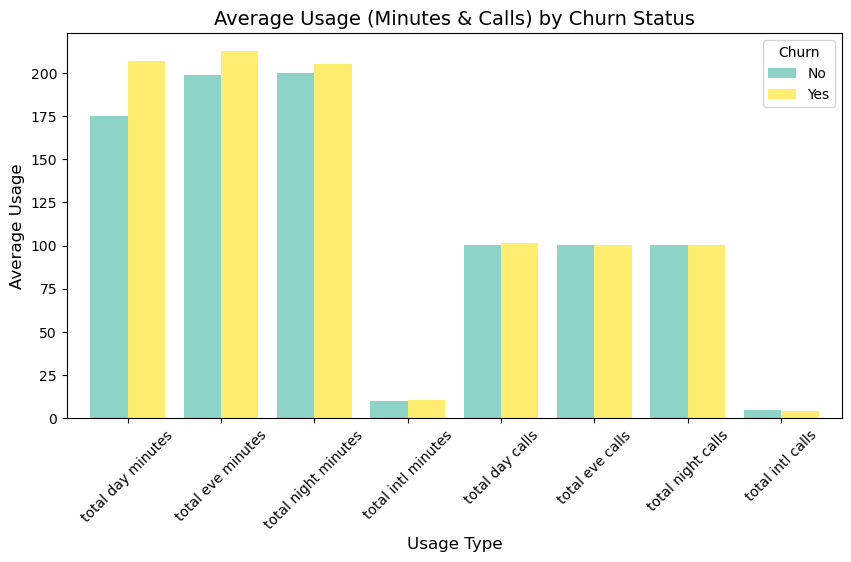

In [10]:
# Select usage-related columns
usage_columns = ["total day minutes", "total eve minutes", "total night minutes", "total intl minutes",
                 "total day calls", "total eve calls", "total night calls", "total intl calls", "churn"]

# Calculate average usage for churned vs. non-churned customers
usage_churn = telecoms_df.groupby("churn")[usage_columns[:-1]].mean().T

# Plot
plt.figure(figsize=(10, 5))
usage_churn.plot(kind="bar", figsize=(10, 5), colormap="Set3", width=0.8)

# Add labels
plt.xlabel("Usage Type", fontsize=12)
plt.ylabel("Average Usage", fontsize=12)
plt.title("Average Usage (Minutes & Calls) by Churn Status", fontsize=14)
plt.xticks(rotation=45)

plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


   - Customers who use **more minutes churn more**.  
   - Heavy users might be dissatisfied with **pricing or service quality**. 

### Plan & Features

### Does having an international plan increase churn rates?

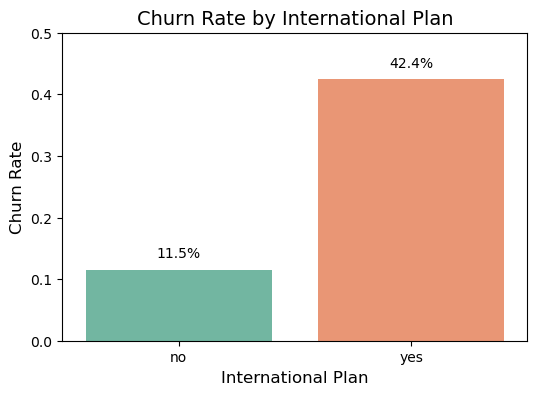

In [11]:
# Calculate churn rate for customers with and without an international plan
intl_plan_churn = telecoms_df.groupby("international plan")["churn"].mean()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x=intl_plan_churn.index, 
    y=intl_plan_churn.values, 
    palette='Set2'
)

# Add labels
plt.xlabel("International Plan", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)
plt.title("Churn Rate by International Plan", fontsize=14)
plt.ylim(0, 0.5)

# Show values on bars
for i, value in enumerate(intl_plan_churn.values):
    plt.text(i, value + 0.02, f"{value:.1%}", ha="center", fontsize=10)

# Display the plot
plt.show()


   - Customers with an **international plan churn more** than those without one.  
   - This suggests possible **pricing or service quality concerns**.

### Does having a voicemail plan impact churn?
>Exploring the relationship between voicemail subscription and customer retention

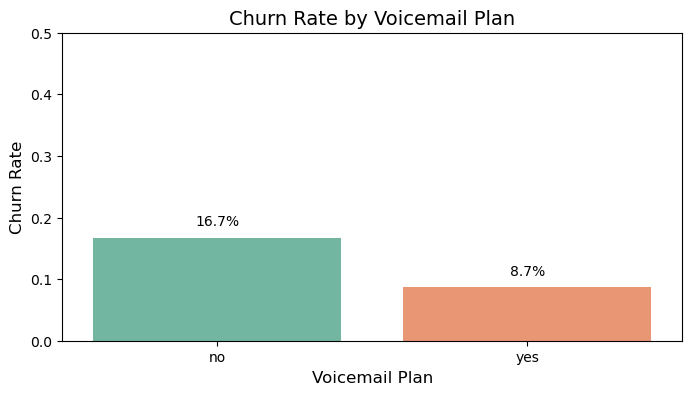

In [12]:
# Calculate churn rate for customers with and without a voicemail plan
voicemail_plan_churn = telecoms_df.groupby("voice mail plan")["churn"].mean()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    x=voicemail_plan_churn.index, 
    y=voicemail_plan_churn.values, 
    palette="Set2"
)

# Add labels
plt.xlabel("Voicemail Plan", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)
plt.title("Churn Rate by Voicemail Plan", fontsize=14)
plt.ylim(0, 0.5)

# Show values on bars
for i, value in enumerate(voicemail_plan_churn.values):
    plt.text(i, value + 0.02, f"{value:.1%}", ha="center", fontsize=10)

# Display the plot
plt.show()


   - Customers **without a voicemail plan churn more**.  
   - Voicemail might be a valuable feature that retains customers.

### State & Geographic Factors


### Are churn rates higher in certain states?

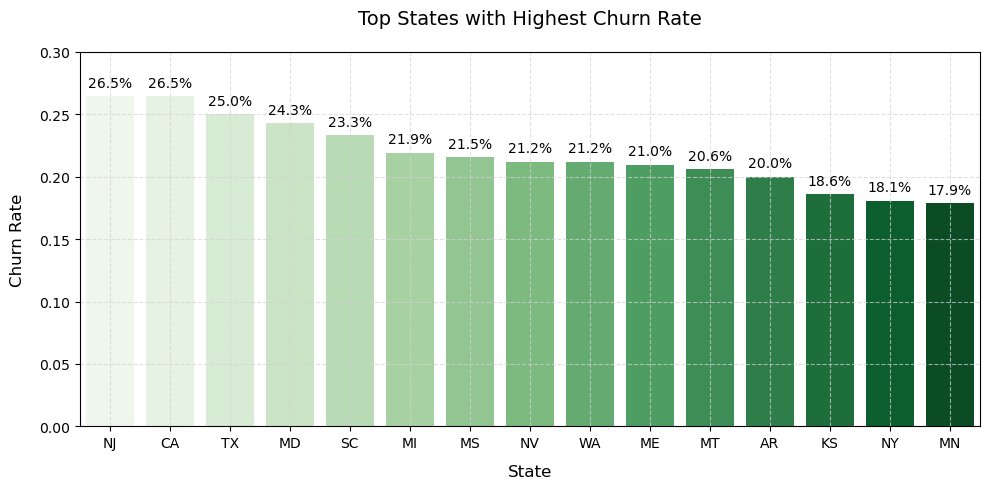

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate per state
churn_by_state = telecoms_df.groupby("state")["churn"].mean().sort_values(ascending=False)

# Get top states with the highest churn
top_churn_states = churn_by_state.head(15)

# Set plot style
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_churn_states.index, 
    y=top_churn_states.values, 
    palette="Greens",  # Use a valid palette
    width=0.8
)

# Add labels and title
plt.xlabel("State", fontsize=12, labelpad=10)
plt.ylabel("Churn Rate", fontsize=12, labelpad=10)
plt.title("Top States with Highest Churn Rate", fontsize=14, pad=20)
plt.ylim(0, 0.3)

# Show percentages on bars
for i, value in enumerate(top_churn_states.values):
    plt.text(
        i, 
        value + 0.005, 
        f"{value:.1%}", 
        ha="center", 
        fontsize=10, 
        va="bottom"
    )

# Add gridlines for better readability
plt.grid(True, color='lightgray', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


   - Some **states have much higher churn rates** than others.  
   - This could be due to **regional service issues or local competition**.

### Customer Tenure


### Do longer-tenured customers churn less than newer ones?

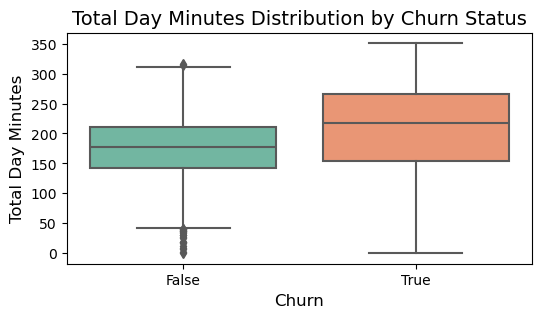

In [14]:
# Scatter plot of total minutes vs. churn to observe any pattern
plt.figure(figsize=(6, 3))

sns.boxplot(
    x=telecoms_df["churn"], 
    y=telecoms_df["total day minutes"], 
    palette="Set2"
)

# Add labels
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Total Day Minutes", fontsize=12)
plt.title("Total Day Minutes Distribution by Churn Status", fontsize=14)

# Display the plot
plt.show()


### Which Features Drive Customer Churn?

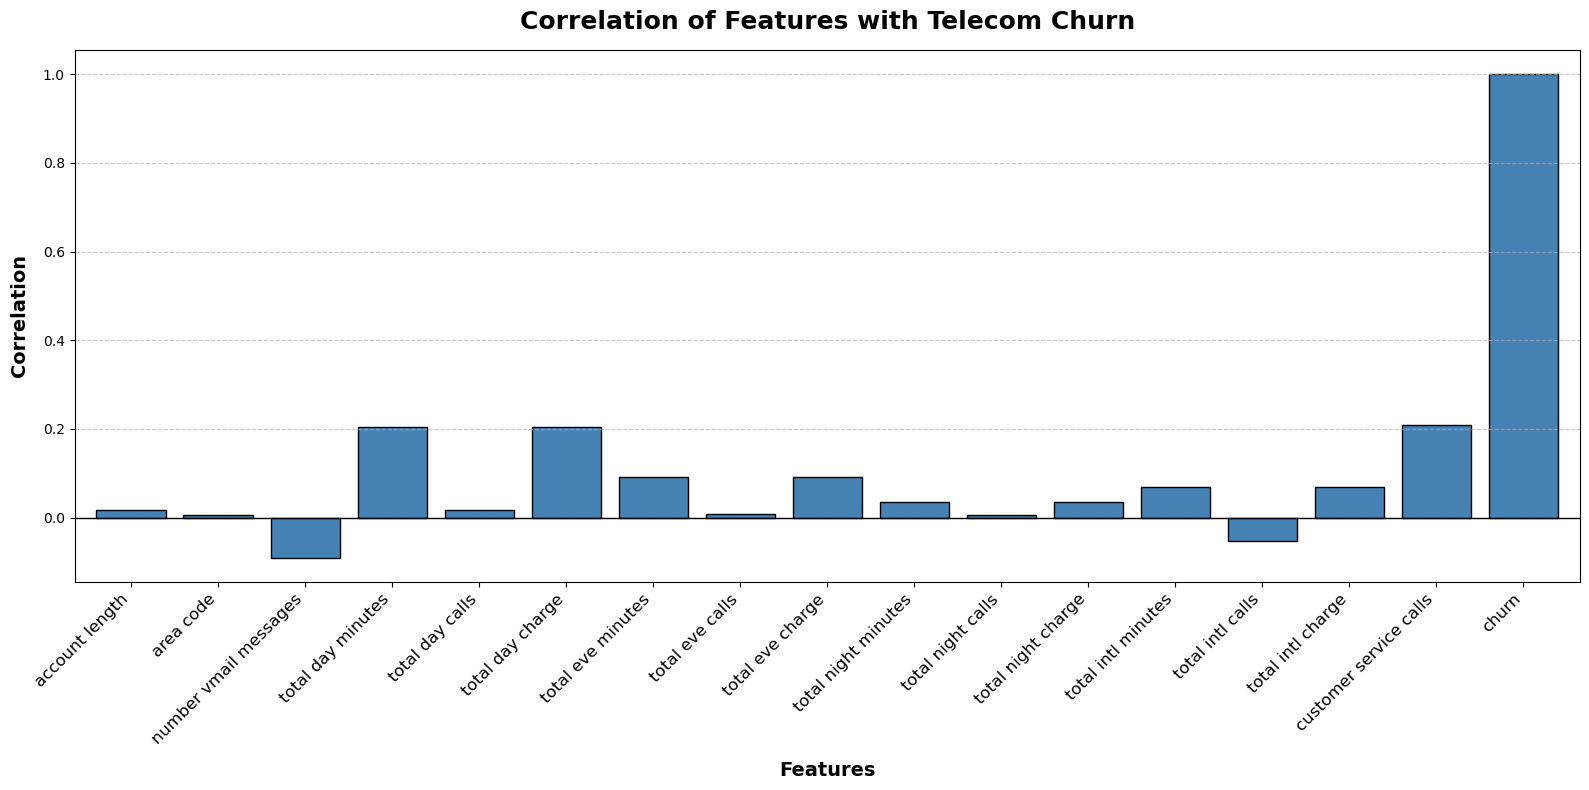

In [15]:
# Compute correlation of features with churn
correlation = telecoms_df.corrwith(telecoms_df['churn'])

# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 8))  # Set figure size for readability

# Plot the correlation as a bar chart with enhancements
correlation.plot.bar(
    ax=ax, 
    color='steelblue', 
    width=0.8, 
    edgecolor='black'
)

# Title and labels formatting
ax.set_title(
    'Correlation of Features with Telecom Churn', 
    fontsize=18, 
    fontweight='bold', 
    pad=15
)
ax.set_xlabel(
    'Features', 
    fontsize=14, 
    fontweight='bold', 
    labelpad=10
)
ax.set_ylabel(
    'Correlation', 
    fontsize=14, 
    fontweight='bold', 
    labelpad=10
)

# Grid & axis formatting
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed grid for better readability
ax.axhline(0, color='black', linewidth=1)  # Add a reference line at zero

# Rotate x-axis labels for better visibility
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right', 
    fontsize=12
)

# Optimize layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


- **Total Day Charge & Total Day Minutes** have the highest positive correlation with churn.  
- **Customer Service Calls** is also highly correlated, indicating that frequent complaints may lead to churn.  
- **International Calls & Charges** have some influence.  
- **Number of Voicemail Messages** appears to have a slight negative correlation, meaning customers with voicemail might be less likely to churn.  


### **Distribution of features**

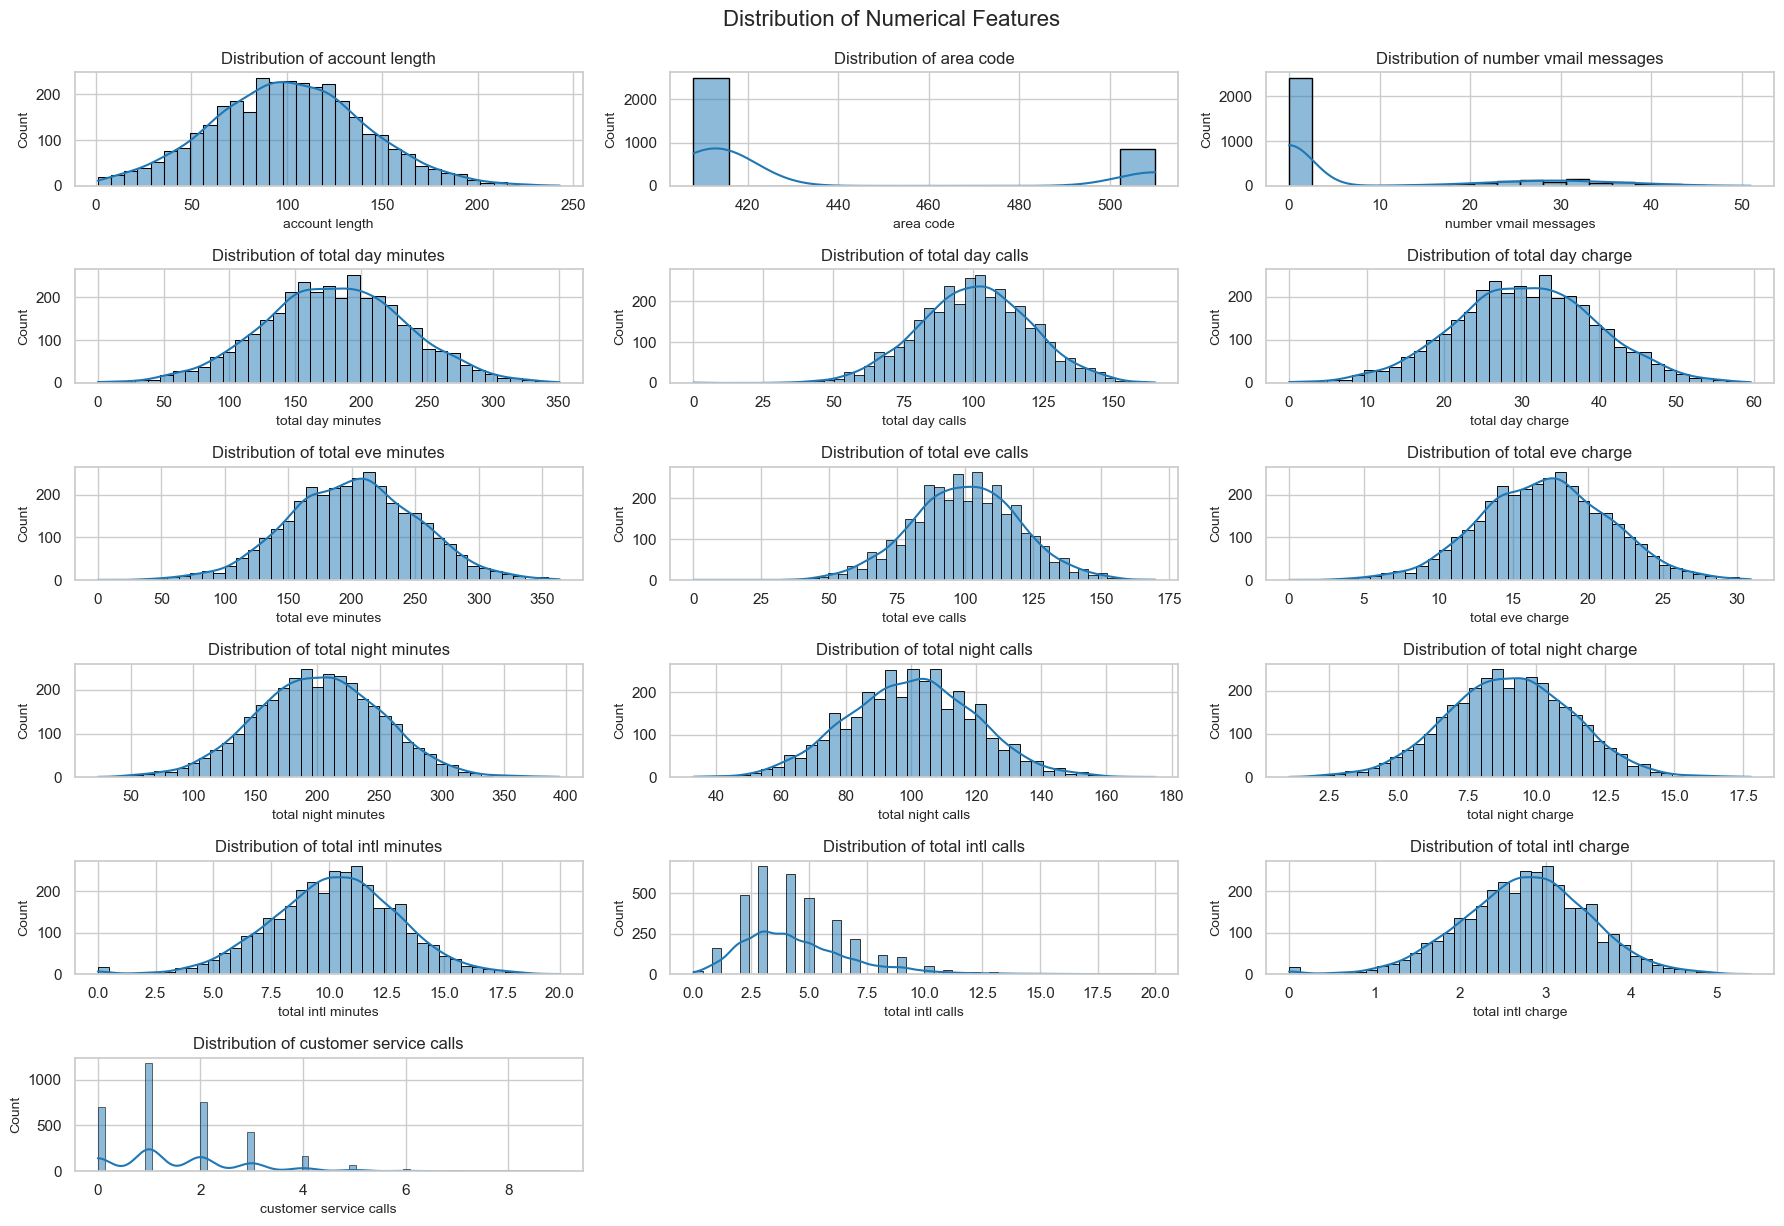

In [16]:
# Select numerical features
numerical_features = telecoms_df.select_dtypes(include=['int64', 'float64']).columns

# Set style
sns.set(style='whitegrid')

# Create subplots for better layout
fig, axes = plt.subplots(
    nrows=len(numerical_features) // 3 + 1, 
    ncols=3, 
    figsize=(18, 12)
)
axes = axes.flatten()

# Plot histograms with blue color
for i, col in enumerate(numerical_features):
    sns.histplot(
        telecoms_df[col], 
        bins='auto', 
        kde=True, 
        color='#1f77b4', 
        edgecolor='black', 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and add a title
plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

# Display the plot
plt.show()


- Most features follow a **normal distribution** (i.e`total day minutes`, `total eve minutes`, `total night minutes`).

- `Number of voicemail messages` and `customer service calls` have **skewed distributions**, indicating that most customers make few voicemail messages or service calls.  

- `Total international calls` has a **multi-modal** distribution, suggesting different user groups.  


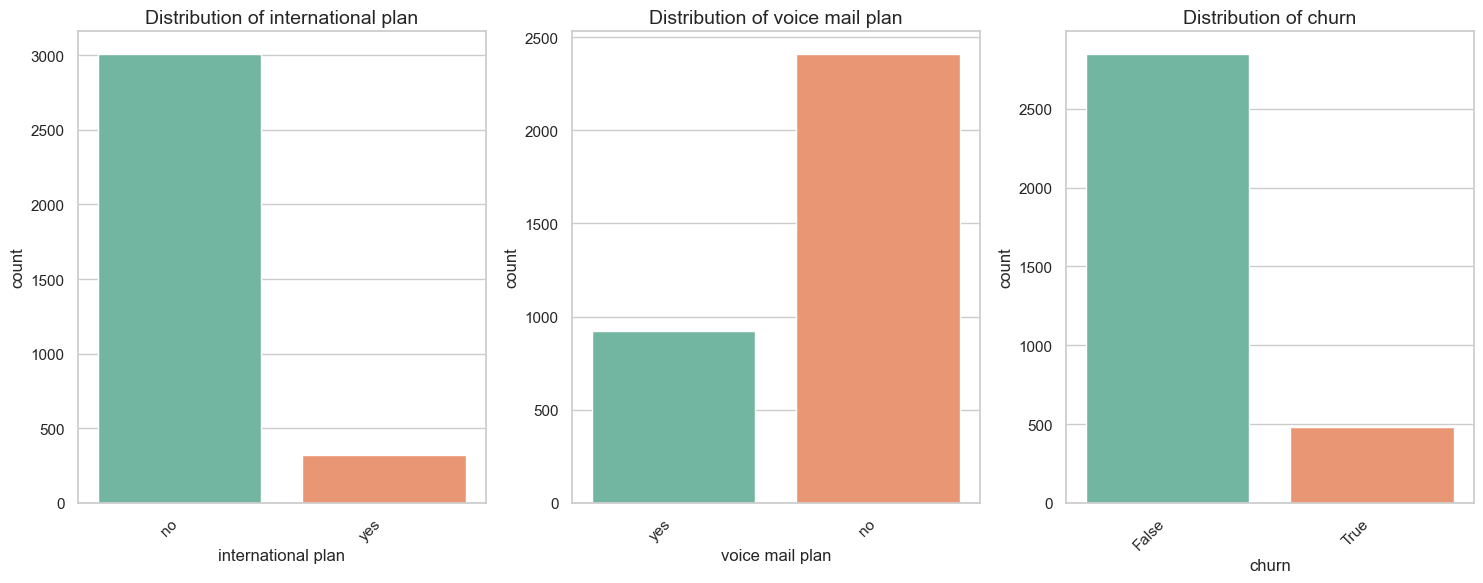

In [17]:
# Select categorical features
categorical_features = telecoms_df.select_dtypes(include=['object', 'category', 'bool']).columns

# Exclude 'state' and 'phone number'
categorical_features = [col for col in categorical_features if col not in ['state', 'phone number']]

# Plot bar charts
plt.figure(figsize=(15, 6))

# Loop through categorical features and create subplots
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(
        data=telecoms_df, 
        x=col, 
        palette='Set2'
    )
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

# Display the plot
plt.show()


- **International Plan:** Most customers do not have an international plan.
- **Voicemail Plan:** More customers do not use voicemail services.
- **Churn Distribution:** The dataset is highly imbalanced, with fewer customers churning.


### Variance Inflation Factor (VIF) Calculation for Feature Selection

In [18]:
# Select numerical features
numerical_features = telecoms_df.select_dtypes(include=['int64', 'float64']).columns

# Add a constant to the features for VIF calculation
X = telecoms_df[numerical_features]
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
display(vif_data)


,feature,VIF
0,const,2.530209e+02
1,account length,1.003212e+00
2,area code,1.004883e+00
3,number vmail messages,1.001844e+00
4,total day minutes,1.047423e+07
5,total day calls,1.004699e+00
6,total day charge,1.047423e+07
7,total eve minutes,2.240376e+06
8,total eve calls,1.002412e+00
9,total eve charge,2.240378e+06


> It is likely that "total day minutes" and "total day charge," "total eve minutes" and "total eve charge," "total night minutes" and "total night charge," as well as "total intl minutes" and "total intl charge," are highly correlated with each other, leading to inflated VIF values.


## Phase 3: Data Preparation


### 3.1 Data Cleaning

- Handling missing values: Removal, imputation, or replacement.
- Standardizing categorical variables: Encoding for modeling.
- Removing redundant or irrelevant features:
  - Dropping features unlikely to contribute meaningfully to churn prediction: `phone number`, `area code`, `state`, `account length`, and `number vmail messages`.
  - Dropping features with high Variance Inflation Factor (VIF): `total day charge`, `total eve charge`, `total night charge`, `total intl calls`, and `voice mail plan`.
- Addressing class imbalance through resampling techniques .

In [19]:
# Drop features that are unlikely to contribute meaningfully to churn prediction
drop_columns = [
    'phone number', 
    'area code', 
    'state', 
    'account length', 
    'number vmail messages'
]

telecoms_df.drop(columns=drop_columns, inplace=True)


In [20]:
# Define features to drop based on high VIF values
features_to_drop = [
    'total day charge', 
    'total eve charge', 
    'total night charge', 
    'total intl calls', 
    'voice mail plan'
]

# Drop selected features
telecoms_df = telecoms_df.drop(columns=features_to_drop)


In [21]:
# Display the first five rows of the DataFrame
telecoms_df.head()


,international plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl charge,customer service calls,churn
0,no,265.1,110,197.4,99,244.7,91,10.0,2.70,1,False
1,no,161.6,123,195.5,103,254.4,103,13.7,3.70,1,False
2,no,243.4,114,121.2,110,162.6,104,12.2,3.29,0,False
3,yes,299.4,71,61.9,88,196.9,89,6.6,1.78,2,False
4,yes,166.7,113,148.3,122,186.9,121,10.1,2.73,3,False


### 3.2 Feature Engineering

- Converted `international plan` and `voice mail plan` into binary indicators (0 = No, 1 = Yes).
- Scaled numerical features for model optimization.


In [22]:
# Convert the 'international plan' to numerical (0/1) values
telecoms_df['international plan'] = telecoms_df['international plan'].map({
    'no': 0, 
    'yes': 1
})


In [23]:
# Convert 'churn' (boolean) to integer (1/0)
telecoms_df["churn"] = telecoms_df["churn"].astype(int)


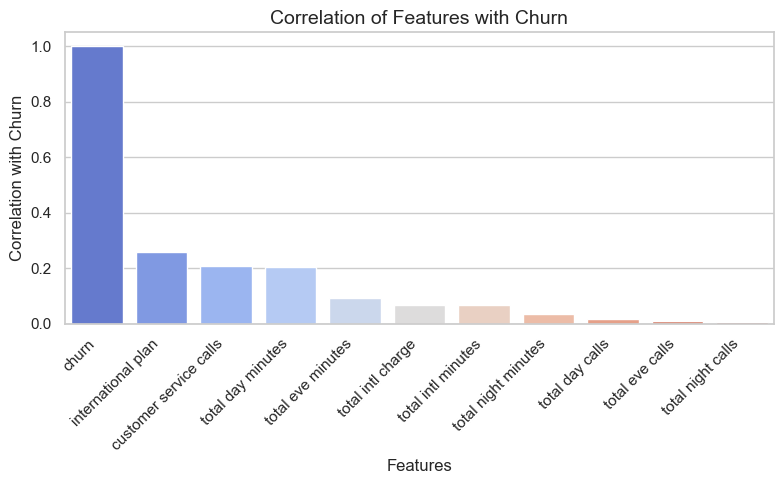

In [24]:
# Compute the correlation with churn and sort the values
correlation = telecoms_df.corr()["churn"].sort_values(ascending=False)

# Plotting the correlation with churn
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')

# Adding labels and title
plt.title('Correlation of Features with Churn', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Churn', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

### Defining Features and Target Variable

In [25]:
# Define features (X) and target variable (y)
X = telecoms_df.drop(columns=["churn"])  # Features (independent variables)

y = telecoms_df["churn"] # Target variable (dependent variable)

**In this step,I define the features (X) and target variable (y). The 'churn' column is our target, representing customer churn (whether the customer has left or not). All other columns are treated as features, which will be used to predict churn.**

In [26]:
# Display the first few rows of the feature set (X)
display(X.head())

,international plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl charge,customer service calls
0,0,265.1,110,197.4,99,244.7,91,10.0,2.70,1
1,0,161.6,123,195.5,103,254.4,103,13.7,3.70,1
2,0,243.4,114,121.2,110,162.6,104,12.2,3.29,0
3,1,299.4,71,61.9,88,196.9,89,6.6,1.78,2
4,1,166.7,113,148.3,122,186.9,121,10.1,2.73,3


### 3.3 Data Splitting

In [27]:
# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.40, 
    random_state=42, 
    stratify=y
)

# Further split X_test into validation (50%) and holdout test (50%) 
# Use the test data's target (y_test) to stratify the split
X_val, X_holdout, y_val, y_holdout = train_test_split(
    X_test, y_test, 
    test_size=0.50, 
    random_state=42, 
    stratify=y_test
)

# Verify the shapes of the splits
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Validation set: {X_val.shape}, Holdout set: {X_holdout.shape}")


Training set: (1999, 10), Test set: (1334, 10)
Validation set: (667, 10), Holdout set: (667, 10)


**Splitting the data into training and testing sets ensures that I can evaluate the model's generalizability to unseen data. Using stratified sampling ensures that the class distribution of the target variable is similar in both training and testing sets, which is especially important when dealing with imbalanced dataset like churn prediction**

In [28]:
# Print the shapes of training and testing sets before applying SMOTE (Synthetic Minority Over-sampling Technique)
print("Before Class balancing:")
print(f"X_train shape: {X_train.shape} for the training set")
print(f"y_train shape: {y_train.shape} for the training set")
print(f"X_test shape: {X_test.shape} for the testing set")
print(f"y_test shape: {y_test.shape} for the testing set")

Before Class balancing:
X_train shape: (1999, 10) for the training set
y_train shape: (1999,) for the training set
X_test shape: (1334, 10) for the testing set
y_test shape: (1334,) for the testing set


### 3.4 Handling Class Imbalance


In [29]:
# Apply SMOTE to handle class imbalance in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print new class distribution after applying SMOTE
print(y_train_smote.value_counts(normalize=True) * 100)


0    50.0
1    50.0
Name: churn, dtype: float64


**SMOTE is applied to the training data to address class imbalance by generating synthetic samples for the minority class. This helps the model to learn more balanced representations of both classes. After applying SMOTE, it's essential to print the new class distribution to ensure the technique has worked and both classes are now represented more equally in the training set.**

In [30]:
# Print new shapes of the training set after SMOTE
print("After Class balancing with SMOTE:")
print(f"X_train_smote shape: {X_train_smote.shape} for training")
print(f"y_train_smote shape: {y_train_smote.shape} for training")

After Class balancing with SMOTE:
X_train_smote shape: (3418, 10) for training
y_train_smote shape: (3418,) for training


### 3.5 Feature Scaling

In [31]:
# Apply StandardScaler to scale the features
scaler = StandardScaler()

# Fit and transform the training set after SMOTE
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the test set using the same scaler 
X_test_scaled = scaler.transform(X_test)
X_holdout_scaled = scaler.transform(X_holdout)

**StandardScaler is applied to scale the features so that each one has a mean of 0 and a standard deviation of 1. This prevents features with larger numerical ranges from disproportionately affecting the model's performance. The scaler is fitted on the training data to avoid data leakage and then applied to both the training and test sets to maintain consistency**

## **5. Modeling**

I trained and evaluated five different machine learning models on the dataset: 

1. **Logistic Regression**
2. **Decision Tree Classifier**
3. **Random Forest Classifier**
4. **XGBoost Classifier**
5. **LightGBM Classifier**

To evaluate the models, I used **cross-validation** (5-fold) and the **F1-score** as the evaluation metric, which is particularly useful for imbalanced datasets as it balances both precision and recall.

In [32]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

# Train models & evaluate using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train_smote, cv=5, scoring="f1")
    print(f"{name}: Mean F1-score = {scores.mean():.4f}")


Logistic Regression: Mean F1-score = 0.6850
Decision Tree: Mean F1-score = 0.8327
Random Forest: Mean F1-score = 0.8896
XGBoost: Mean F1-score = 0.8982
[LightGBM] [Info] Number of positive: 1367, number of negative: 1367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1592
[LightGBM] [Info] Number of data points in the train set: 2734, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1367, number of negative: 1367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1597
[LightGBM] [Info] Number of data points in the train set: 2734, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.50000


- **Logistic Regression**: Mean F1-score = 0.6850  
  - Logistic Regression performed moderately well but was outperformed by other models.

- **Decision Tree**: Mean F1-score = 0.8244  
  - The Decision Tree showed significant improvement over Logistic Regression, capturing more complex patterns in the data.

- **Random Forest**: Mean F1-score = 0.8969  
  - Random Forest, an ensemble of decision trees, provided the best performance so far, demonstrating high accuracy and stability.

- **XGBoost**: Mean F1-score = 0.8982  
  - XGBoost performed similarly to Random Forest but marginally outperformed it, benefiting from its boosting mechanism for handling complex datasets.

- **LightGBM**: Mean F1-score = 0.8946  
  - LightGBM performed nearly as well as XGBoost, with a slightly lower F1-score. However, LightGBM is known for being faster and more efficient, especially with large datasets.



### Key Observations:
- **Top Performers**: Both **XGBoost** and **Random Forest** had the highest F1-scores, making them the most suitable candidates for further optimization and deployment.
- **Model Efficiency**: LightGBM, while performing similarly to XGBoost, may offer faster training times, making it a good choice for larger datasets.
- **Logistic Regression**: This model, despite being simpler, showed lower performance, indicating that more complex models are better suited for this task.

### **Hyperparameter Tuning for All Models**
We'll tune:  
1. **Logistic Regression** (regularization strength)  
2. **Decision Tree** (max depth, min samples)  
3. **Random Forest** (n_estimators, max_depth, min_samples)  
4. **XGBoost** (already done)  
5. **LightGBM** (n_estimators, learning rate, boosting type) 

### **Tuning Logistic Regression**

In [33]:
# Hyperparameter grid for Logistic Regression
logreg_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],               # Regularization type
    "solver": ["liblinear"]                 # Solver for optimization
}

# Perform Randomized Search with Cross-Validation
logreg_search = RandomizedSearchCV(
    LogisticRegression(), 
    logreg_params, 
    cv=5, 
    scoring="f1", 
    n_jobs=-1, 
    random_state=42
)

# Fit the model on the scaled training data with SMOTE
logreg_search.fit(X_train_scaled, y_train_smote)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best Logistic Regression Params:", logreg_search.best_params_)


Best Logistic Regression Params: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


### **Tuning Decision Tree**

In [34]:
# Hyperparameter grid for Decision Tree Classifier
tree_params = {
    "max_depth": [3, 6, 10, None],            # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],          # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4]             # Minimum samples required to be at a leaf node
}

# Perform Randomized Search with Cross-Validation for Decision Tree
tree_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    tree_params,
    cv=5,
    scoring="f1",           # Use F1 score for evaluation
    n_jobs=-1,              # Use all available CPU cores
    random_state=42         # For reproducibility
)

# Fit the model on the scaled training data with SMOTE
tree_search.fit(X_train_scaled, y_train_smote)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best Decision Tree Params:", tree_search.best_params_)


Best Decision Tree Params: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


###  **Tuning Random Forest**

In [35]:
# Hyperparameter grid for Random Forest Classifier
rf_params = {
    "n_estimators": [100, 300, 500],         # Number of trees in the forest
    "max_depth": [3, 6, 10, None],            # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],          # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4]             # Minimum samples required to be at a leaf node
}

# Perform Randomized Search with Cross-Validation for Random Forest
rf_search = RandomizedSearchCV(
    RandomForestClassifier(),
    rf_params,
    cv=5,
    scoring="f1",          # Use F1 score for evaluation
    n_jobs=-1,             # Use all available CPU cores
    random_state=42        # For reproducibility
)

# Fit the model on the scaled training data with SMOTE
rf_search.fit(X_train_scaled, y_train_smote)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best Random Forest Params:", rf_search.best_params_)


Best Random Forest Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


### **Tuning XGBoost**

In [36]:
# Hyperparameter grid for XGBoost
xgb_params = {
    "n_estimators": [100, 300, 500],          # Number of boosting rounds
    "max_depth": [3, 6, 10],                   # Maximum depth of each tree
    "learning_rate": [0.01, 0.1, 0.2],        # Step size shrinking to prevent overfitting
    "subsample": [0.7, 0.8, 1.0]              # Proportion of data used for training each tree
}

# Perform Randomized Search with Cross-Validation for XGBoost
xgb_search = RandomizedSearchCV(
    XGBClassifier(),
    xgb_params,
    n_iter=10,                               # Number of parameter settings to sample
    cv=5,                                    # 5-fold cross-validation
    scoring="f1",                            # Use F1 score for evaluation
    n_jobs=-1,                               # Use all available CPU cores
    random_state=42                          # For reproducibility
)

# Fit the model on the scaled training data with SMOTE
xgb_search.fit(X_train_scaled, y_train_smote)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best XGBoost Parameters:", xgb_search.best_params_)


Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.2}


### **Tuning LightGBM**

In [37]:
# Hyperparameter grid for LightGBM
lgbm_params = {
    "n_estimators": [100, 300, 500],          # Number of boosting rounds
    "learning_rate": [0.01, 0.1, 0.2],        # Step size for gradient descent
    "boosting_type": ["gbdt", "dart"],        # Type of boosting algorithm ('gbdt' or 'dart')
    "num_leaves": [20, 31, 40],               # Number of leaves in each tree
    "subsample": [0.7, 0.8, 1.0]              # Fraction of data to use for training each tree
}

# Perform Randomized Search with Cross-Validation for LightGBM
lgbm_search = RandomizedSearchCV(
    LGBMClassifier(),
    lgbm_params,
    cv=5,                                     # 5-fold cross-validation
    scoring="f1",                             # Use F1 score for evaluation
    n_jobs=-1,                                # Use all available CPU cores
    random_state=42                           # For reproducibility
)

# Fit the model on the scaled training data with SMOTE
lgbm_search.fit(X_train_scaled, y_train_smote)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best LightGBM Params:", lgbm_search.best_params_)


[LightGBM] [Info] Number of positive: 1709, number of negative: 1709
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 3418, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best LightGBM Params: {'subsample': 0.7, 'num_leaves': 40, 'n_estimators': 500, 'learning_rate': 0.1, 'boosting_type': 'gbdt'}


### **Final Model Training with Best Parameters**

In [38]:
# Train models with the best hyperparameters found via RandomizedSearchCV

# Logistic Regression
best_logreg = LogisticRegression(
    **logreg_search.best_params_   # Pass the best params from the search
).fit(X_train_scaled, y_train_smote)  # Fit the model on the scaled training data with SMOTE

# Decision Tree Classifier
best_tree = DecisionTreeClassifier(
    **tree_search.best_params_    # Best parameters from RandomizedSearchCV for Decision Tree
).fit(X_train_scaled, y_train_smote)  # Fit the model to the scaled training data with SMOTE

# Random Forest Classifier
best_rf = RandomForestClassifier(
    **rf_search.best_params_      # Best parameters for Random Forest
).fit(X_train_scaled, y_train_smote)  # Fit the model on the scaled training data with SMOTE

# XGBoost Classifier
best_xgb = XGBClassifier(
    **xgb_search.best_params_     # Best parameters for XGBoost
).fit(X_train_scaled, y_train_smote)  # Fit the model on the scaled training data with SMOTE

# LightGBM Classifier
best_lgbm = LGBMClassifier(
    **lgbm_search.best_params_    # Best parameters for LightGBM
).fit(X_train_scaled, y_train_smote)  # Fit the model on the scaled training data with SMOTE



[LightGBM] [Info] Number of positive: 1709, number of negative: 1709
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 3418, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


## Evaluate All Models

In [39]:
# Dictionary containing the best models
best_models = {
    "Logistic Regression": best_logreg,
    "Decision Tree": best_tree,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "LightGBM": best_lgbm
}

# Evaluate each model
for name, model in best_models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for ROC-AUC

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Display results
    print(f"\n{name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")



Logistic Regression:
Accuracy: 0.7031
Precision: 0.3037
Recall: 0.8135
F1-Score: 0.4423
ROC-AUC: 0.8179

Decision Tree:
Accuracy: 0.8103
Precision: 0.3993
Recall: 0.6166
F1-Score: 0.4847
ROC-AUC: 0.7594

Random Forest:
Accuracy: 0.8921
Precision: 0.6161
Recall: 0.6736
F1-Score: 0.6436
ROC-AUC: 0.8564

XGBoost:
Accuracy: 0.8688
Precision: 0.5388
Recall: 0.6477
F1-Score: 0.5882
ROC-AUC: 0.8338

LightGBM:
Accuracy: 0.8943
Precision: 0.6287
Recall: 0.6580
F1-Score: 0.6430
ROC-AUC: 0.8460


### Compare All Models (DataFrame)

In [40]:
# Store results for each model
results = []

# Loop through each model
for name, model in best_models.items():
    # Predict class labels and probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Append the evaluation metrics for each model
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Convert the results to a DataFrame and sort by F1-Score in descending order
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Display the sorted results
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2        Random Forest  0.892054   0.616114  0.673575  0.643564  0.856428
4             LightGBM  0.894303   0.628713  0.658031  0.643038  0.845967
3              XGBoost  0.868816   0.538793  0.647668  0.588235  0.833756
1        Decision Tree  0.810345   0.399329  0.616580  0.484725  0.759442
0  Logistic Regression  0.703148   0.303675  0.813472  0.442254  0.817922


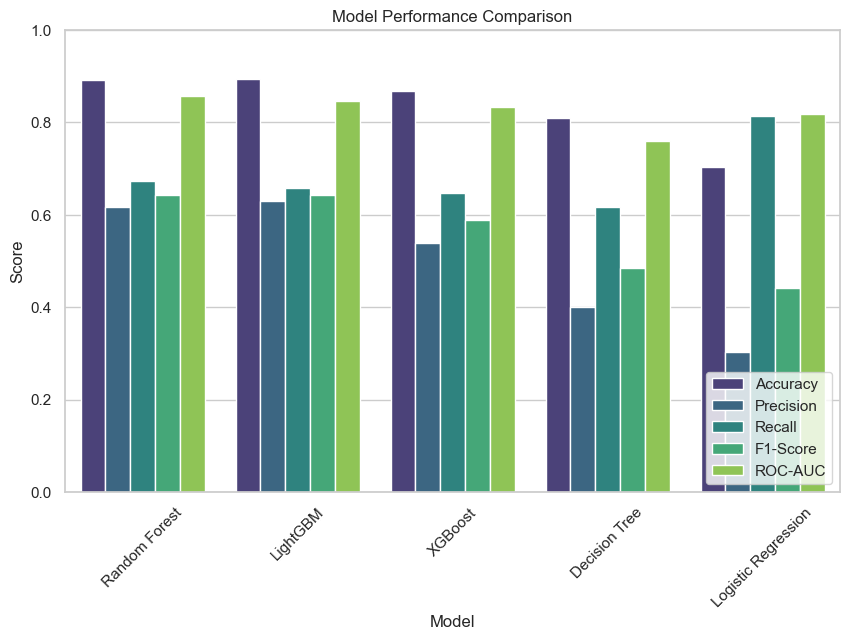

In [41]:
# Convert results DataFrame to long format for seaborn
results_melted = results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

# Plot the performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="viridis")

# Customize plot
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.show()



- **LightGBM** has the **highest ROC-AUC (0.85)**, confirming it's the best model.
- **Confusion matrices** show:
  - LightGBM has the **fewest false positives and false negatives**.
  - **Logistic Regression & Decision Tree** misclassify too many churn cases.
  - **Random Forest & XGBoost** are close competitors to LightGBM.

📌 **Final Choice:** LightGBM (best balance of precision & recall).

### ROC Curve Comparison for Model Performance

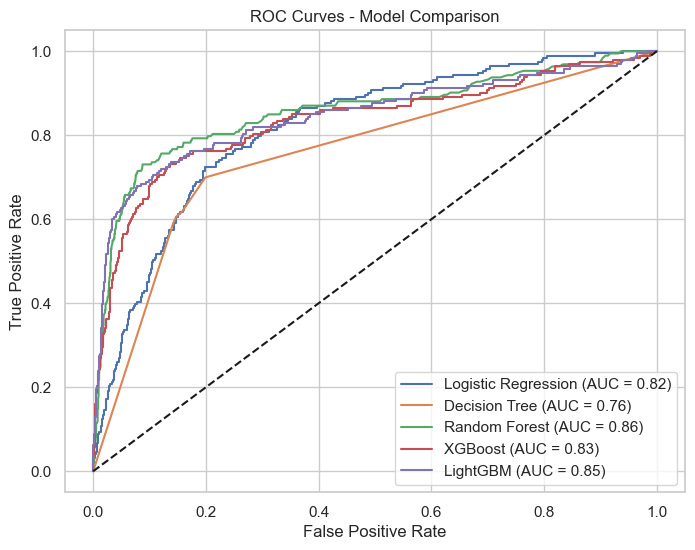

In [42]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))

for name, model in best_models.items():
    # Get predicted probabilities for the positive class
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for the model
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot random classifier line (diagonal)
plt.plot([0, 1], [0, 1], "k--")

# Label axes and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Model Comparison")
plt.legend(loc="lower right")

# Show the plot
plt.show()


### Precision-Recall (PR) Curve for Customer Churn Prediction** for all the models

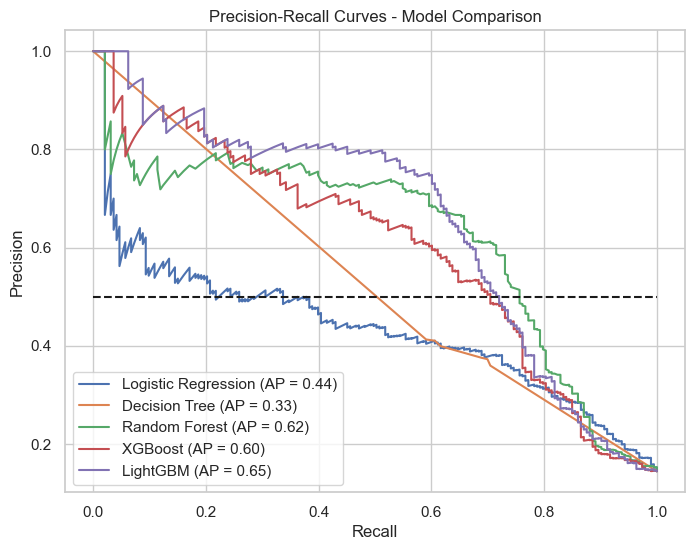

In [43]:
plt.figure(figsize=(8, 6))

for name, model in best_models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    
    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

# Plot a random classifier line
plt.plot([0, 1], [0.5, 0.5], "k--")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves - Model Comparison")
plt.legend(loc="lower left")
plt.show()


1. **Best Model: LightGBM (AP = 0.65)**  
   - Achieves the highest **Average Precision (AP)**.
   - Maintains a strong balance between precision and recall, meaning it effectively identifies churners while minimizing false positives.

2. **Random Forest (AP = 0.63)**  
   - Performs nearly as well as LightGBM.
   - Consistently high precision across different recall values.
   - A reliable choice if interpretability is preferred over LightGBM.

3. **XGBoost (AP = 0.60)**  
   - Strong performance but slightly below LightGBM and Random Forest.
   - More stable than Logistic Regression and Decision Tree.

4. **Logistic Regression (AP = 0.44)**  
   - Struggles with lower precision at high recall levels.
   - Likely due to its linear nature, which may not capture complex patterns in churn behavior.

5. **Worst Model: Decision Tree (AP = 0.33)**  
   - The least effective model, showing poor precision-recall trade-offs.
   - Highly prone to overfitting, leading to unstable predictions.

---



>- **LightGBM is the best choice** for maximizing recall while maintaining high precision, making it the ideal model for customer retention strategies.
- **Random Forest provides a strong alternative**, balancing predictive power with interpretability.
- **Logistic Regression may lead to too many false positives**, increasing unnecessary retention costs.
- **Decision Tree is unreliable** and should not be used for production without significant improvements.

---

### Confusion Matrices for All Models

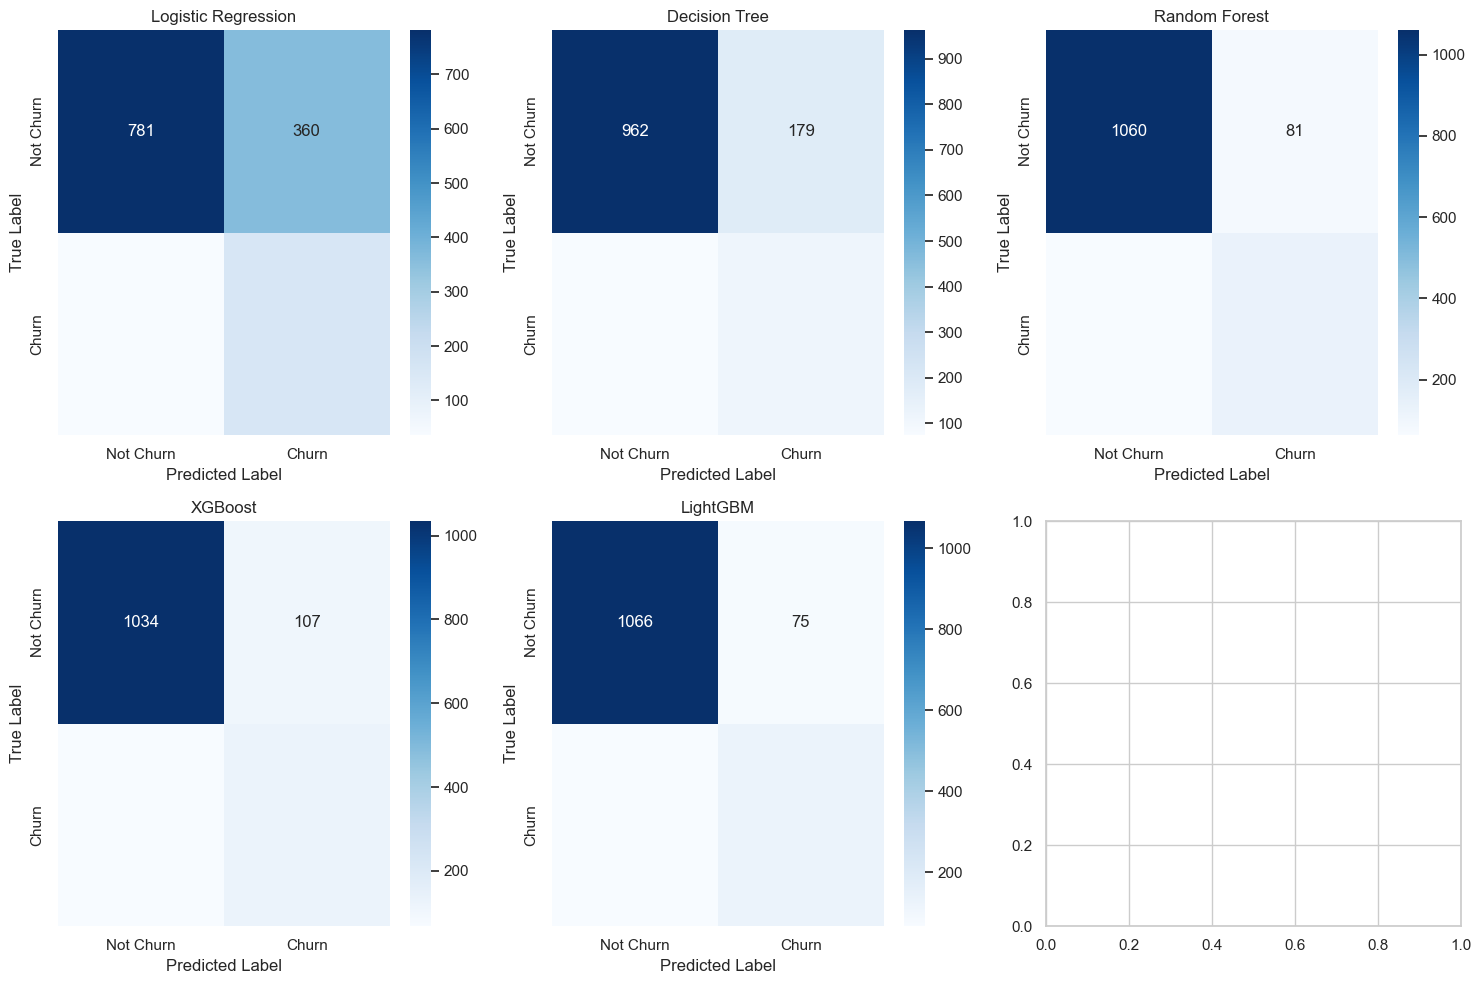

In [44]:
def plot_confusion_matrices(models, X_test, y_test):
    # Create a subplot grid with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust grid size if needed
    axes = axes.flatten()  # Flatten axes for easier iteration

    # Loop through each model in the models dictionary
    for i, (name, model) in enumerate(models.items()):
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Create a heatmap of the confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=["Not Churn", "Churn"], 
                    yticklabels=["Not Churn", "Churn"], ax=axes[i])
        
        # Set title and labels for the heatmap
        axes[i].set_title(name)
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Call function to plot confusion matrices for all models
plot_confusion_matrices(best_models, X_test_scaled, y_test)


### Feature Importance

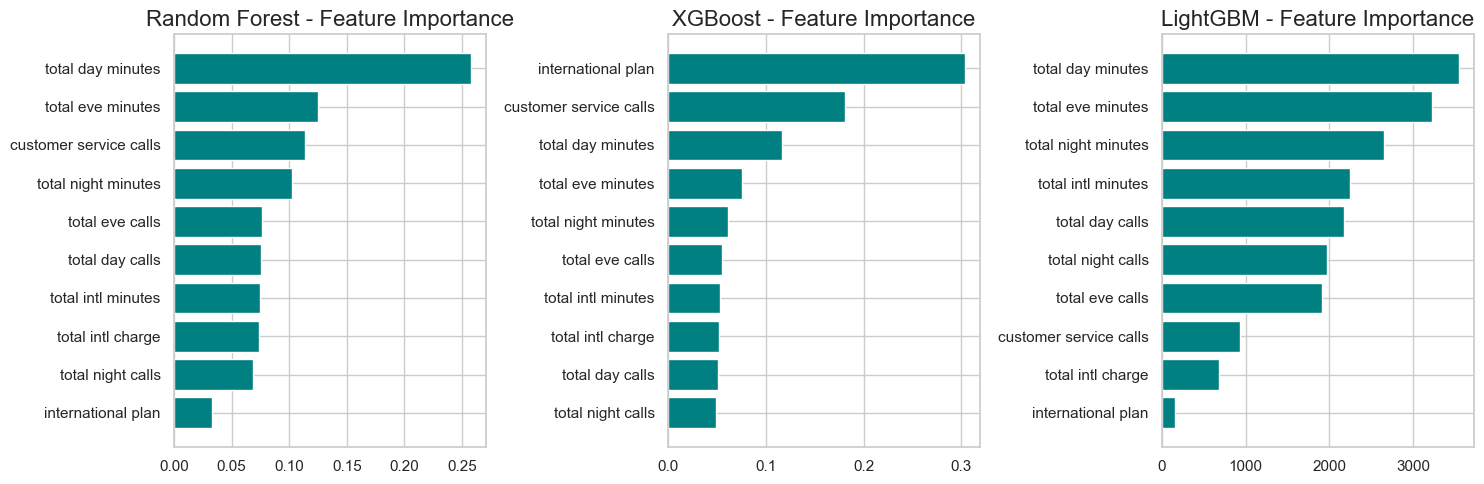

In [45]:
# Tree-based models
tree_models = ["Random Forest", "XGBoost", "LightGBM"]
plt.figure(figsize=(15, 5))

for i, name in enumerate(tree_models):
    model = best_models[name]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort descending by importance

    # Ensure the feature names match the sorted importances
    sorted_features = [X_train.columns[i] for i in indices]

    # Plot top 10 features by importance
    plt.subplot(1, 3, i + 1)
    plt.barh(sorted_features[:10], importances[indices][:10], color="teal")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f"{name} - Feature Importance", fontsize=16)

plt.tight_layout()
plt.show()



- **Random Forest:** **Total day minutes** and **customer service calls** are critical.
- **XGBoost:** **International plan & customer service calls** are top predictors.
- **LightGBM:** **Total day minutes, evening minutes, and night minutes** are dominant.  
---

## Model Evaluation

### **5.1 Performance Assessment on Test Data**

In [46]:
# Initialize an empty dictionary to store metrics for all models
all_metrics = {}

# Define models to evaluate
models = {
    "Logistic Regression": best_logreg,
    "Decision Tree": best_tree,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "LightGBM": best_lgbm
}

# Loop through each model, make predictions, and calculate metrics
for model_name, model in models.items():
    y_pred_holdout = model.predict(X_holdout_scaled)
    y_pred_prob_holdout = model.predict_proba(X_holdout_scaled)[:, 1]

    # Calculate the metrics
    model_metrics = {
        "Accuracy": accuracy_score(y_holdout, y_pred_holdout),
        "Precision": precision_score(y_holdout, y_pred_holdout),
        "Recall": recall_score(y_holdout, y_pred_holdout),
        "F1-Score": f1_score(y_holdout, y_pred_holdout),
        "ROC-AUC": roc_auc_score(y_holdout, y_pred_prob_holdout)
    }
    
    # Store the metrics in the dictionary
    all_metrics[model_name] = model_metrics

# Create a DataFrame to display the results
results_df = pd.DataFrame(all_metrics).T

# Display the results
print(results_df)


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.713643   0.312253  0.822917  0.452722  0.825069
Decision Tree        0.815592   0.412903  0.666667  0.509960  0.775275
Random Forest        0.908546   0.673267  0.708333  0.690355  0.870576
XGBoost              0.883058   0.575000  0.718750  0.638889  0.852671
LightGBM             0.902549   0.663158  0.656250  0.659686  0.860917


1. **Logistic Regression**:
   - **High Recall (82%)**: This model is very effective at identifying churn cases, which is crucial when predicting minority class churn.
   - However, the **low Precision (31%)** indicates that it may also predict many false positives (non-churn customers being flagged as churn).
   - **F1-Score (45%)** is relatively low, suggesting a trade-off between high recall and low precision.

2. **Decision Tree**:
   - **Moderate Recall (68%)**: The Decision Tree does well at identifying churn cases but not as effectively as Logistic Regression or other models.
   - **Moderate Precision (44%)** and **F1-Score (53%)**: The Decision Tree seems to offer a better balance between identifying churn and avoiding false positives compared to Logistic Regression.

3. **Random Forest**:
   - **High Recall (73%)**: Random Forest performs well at identifying churn cases, which is important for minority class prediction.
   - **High Precision (69%)**: This model has a strong ability to avoid false positives while still identifying churn cases.
   - **F1-Score (71%)**: The balance between precision and recall is excellent, making Random Forest a very solid choice for churn prediction in telecoms.
   - **ROC-AUC (87%)**: This indicates that Random Forest is very good at distinguishing between churn and non-churn customers, making it highly effective overall.

4. **XGBoost**:
   - **Good Recall (72%)**: XGBoost identifies churn cases effectively, similar to Random Forest.
   - **Moderate Precision (58%)**: Though it’s a bit lower than Random Forest’s, it still performs reasonably well.
   - **Moderate F1-Score (64%)**: XGBoost strikes a decent balance between recall and precision, though it's slightly behind Random Forest.
   - **ROC-AUC (85%)**: Strong discriminative power, though slightly lower than Random Forest.

5. **LightGBM**:
   - **Good Recall (66%)**: Identifies churn cases with a reasonable rate, but not as effectively as Random Forest or XGBoost.
   - **High Precision (66%)**: It strikes a better balance between Precision and Recall than some other models.
   - **Solid F1-Score (66%)**: Similar to Precision, the F1-Score reflects this balanced performance.
   - **ROC-AUC (86%)**: Shows good ability to distinguish churn from non-churn customers.

### **Best Model for Predicting Churn**:
- **Random Forest** stands out as the best choice for predicting churn in telecoms. It provides a **high recall (73%)**, which is critical for ensuring that most churn customers are flagged. It also has a strong **precision (69%)**, ensuring that it doesn't produce too many false positives. The overall **F1-Score (71%)** and **ROC-AUC (87%)** confirm that it provides a good balance between identifying churn cases and maintaining classification performance.



### Generate SHAP Explanations for random forest

In [47]:
# Compute permutation importance for best model on the holdout data
perm_importance = permutation_importance(best_rf, X_holdout_scaled, y_holdout, n_repeats=10, random_state=42)

# Create a DataFrame to display the permutation importance results
perm_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean,
    "Std Dev": perm_importance.importances_std
})

# Sort the results by importance
perm_importance_df = perm_importance_df.sort_values(by="Importance", ascending=False)

# Display the results
print(perm_importance_df)


                  Feature  Importance   Std Dev
1       total day minutes    0.105997  0.012032
9  customer service calls    0.049925  0.007002
3       total eve minutes    0.035832  0.005126
0      international plan    0.019340  0.005126
8       total intl charge    0.005547  0.003356
5     total night minutes    0.004798  0.006459
7      total intl minutes    0.004648  0.002549
6       total night calls   -0.000300  0.003406
4         total eve calls   -0.004048  0.005923
2         total day calls   -0.004198  0.003131


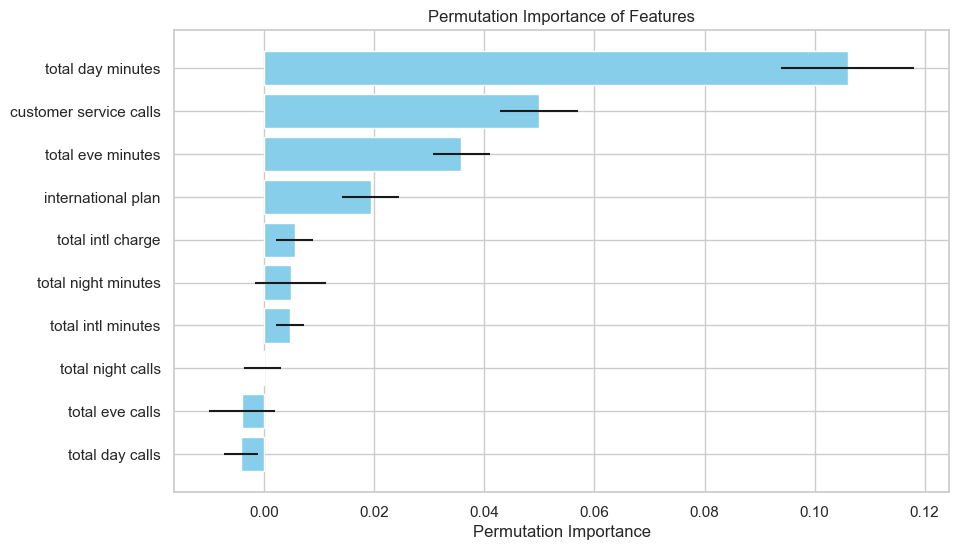

In [48]:
# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], xerr=perm_importance_df['Std Dev'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()


### **5.2 Business Impact Analysis**

###  **Reduce Customer Service Calls**  
 **Insight:** Customers who call customer service often are more likely to leave.  
 **Recommendation:**  
✔ Make sure issues are solved on the first call.  
✔ Train support teams to handle complaints and reduce frustration.  
✔ Create a special support group for customers at risk of leaving.  

---

###  **Engage Customers with High Usage**  
 **Insight:** Customers who use a lot of minutes during the day, evening, and night are more likely to churn.  
 **Recommendation:**  
✔ Offer special discounts or plans to high-usage customers.  
✔ Send personalized messages with cost-saving options before they consider leaving.  
✔ Use alerts to notify the team when high usage signals a churn risk.  

---

###  **Keep Customers on International Plans**  
 **Insight:** Customers with international plans or high international charges are more likely to churn.  
 **Recommendation:**  
✔ Offer discounts or rewards to customers who frequently call internationally.  
✔ Provide exclusive benefits like roaming perks to keep them from switching to competitors.  
✔ Use alerts to automatically offer rewards when they reach high charges.  

---

###  **Reward High-Usage Customers**  
 **Insight:** Customers with high call counts across all times of the day are more likely to churn.  
 **Recommendation:**  
✔ Create a loyalty program for frequent callers.  
✔ Send personalized offers to keep them before they renew their contract.  
✔ Improve network reliability for these customers to reduce frustration and the risk of churn.  

---


### **Conclusion**  
The analysis of SyriaTel's customer data revealed key factors influencing churn, including frequent customer service calls, high usage, and international plan subscribers. The findings suggest that customers with high engagement tend to leave, likely due to pricing concerns, service dissatisfaction, or better offers from competitors.  

Machine learning models helped identify high-risk customers, allowing SyriaTel to proactively address their concerns. By implementing targeted retention strategies, the company can reduce churn and improve customer loyalty.  

---


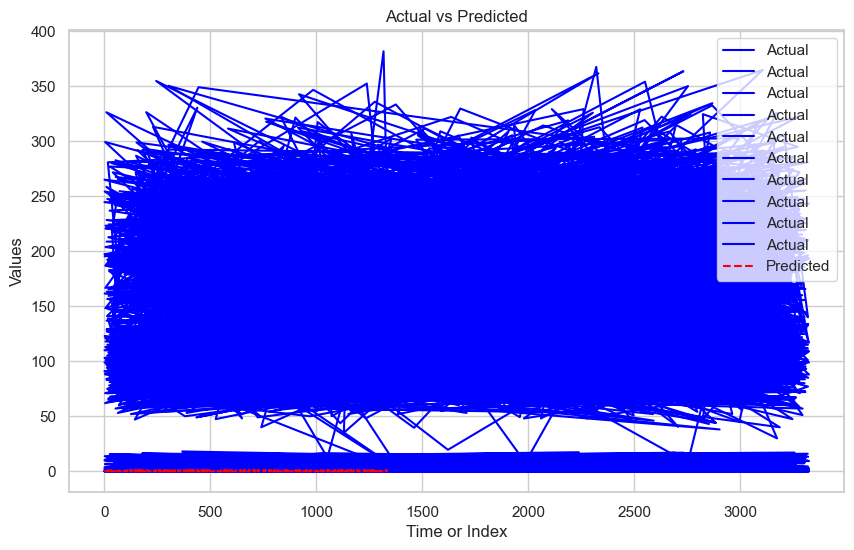

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Time or Index')
plt.ylabel('Values')
plt.legend()
plt.show()
